## About Dataset


#### *Dataset Overview*

**This comprehensive dataset offers an in-depth analysis of social media engagements across various platforms. It captures the dynamics of user interactions by tracking the number of reactions, comments, shares, and types of posts. Ideal for social media analysts, marketers, and researchers, this dataset serves as a critical tool for understanding digital communication trends and enhancing social media strategies. Each entry provides detailed metrics on how posts are received by audiences, enabling data-driven insights into content performance.**


#### Key Features:

📌 ***num_reactions:*** Total number of reactions a post receives, encapsulating the overall engagement.

📍 ***num_comments:*** Reflects the level of audience interaction through comments.

📸 ***num_shares:*** Indicates the virality of the post by counting how many times it has been shared.

❤️ ***num_likes:*** Tracks the number of likes, showing general approval of the content.

🥰 ***num_loves:*** Captures more intense affection reactions to posts.

😮 ***num_wows:*** Measures the surprise or awe factor of the post.

😂 ***num_hahas:*** Counts instances of amusement or laughter triggered by the post.

😢 ***num_sads:*** Reflects the number of sad reactions, indicating emotional impact.

😡 ***num_angrys:*** Tracks angry reactions, highlighting content that might be controversial or upsetting.

🔗 ***status_type_link:*** Binary indicator of whether the post includes a link, enhancing its informational value.

🖼️ ***status_type_photo:*** Identifies posts with photos, crucial for visual content analysis.

📝 ***status_type_status:*** Marks textual posts, focusing on written content engagement.

🎥 ***status_type_video:*** Distinguishes posts with videos, important for engagement in dynamic content.***


*This dataset not only aids in measuring the effectiveness of social media campaigns but also supports the development of targeted marketing strategies and content optimization efforts to maximize audience engagement.*

**LINK:** <a class="sc-bhjgvs iimbyZ" href="https://www.kaggle.com/datasets/mehmetisik/livedataset/data">Social Media Engagement: A Comprehensive Analysis</a>

### Clustering

* Clustering is a technique used in unsupervised learning to group similar data points together based on their intrinsic characteristics or similarities. It aims to identify patterns or structures in the data without prior knowledge of the groupings or labels.

* In clustering, data points are grouped into clusters based on their proximity to each other in the feature space. The goal is to maximize the similarity within clusters and minimize the similarity between different clusters. Clustering algorithms assign data points to clusters by considering the similarity or dissimilarity between the data points' attributes or distances between them.

* Clustering is widely used in various fields, such as data mining, pattern recognition, image analysis, customer segmentation, market research, and anomaly detection. It helps in discovering hidden patterns, understanding data distributions, and organizing large datasets into meaningful groups for further analysis or decision-making.

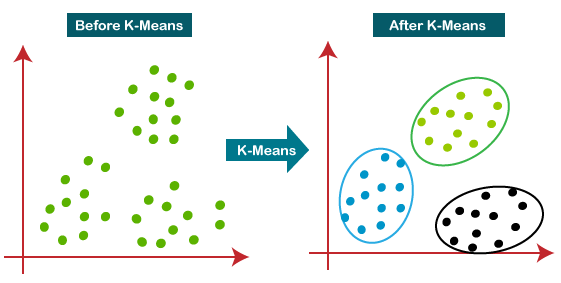

In [1]:
from IPython.display import Image
Image(filename=r'C:\Users\erpra\Documents\Machine_learning\clustering\Social Media Engagement A Comprehensive Analysis\k-means-clustering-algorithm-in-machine-learning.png',width=800, height=400)


### 1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

warnings.filterwarnings('ignore')

##  2. Loading the Data Set

In [3]:
df = pd.read_csv(r"C:\Users\erpra\Documents\Machine_learning\clustering\Social Media Engagement A Comprehensive Analysis\Social Media Engagement.csv")
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


## 3. Checking the dataset

In [4]:
df.isna().sum()

num_reactions         0
num_comments          0
num_shares            0
num_likes             0
num_loves             0
num_wows              0
num_hahas             0
num_sads              0
num_angrys            0
status_type_link      0
status_type_photo     0
status_type_status    0
status_type_video     0
dtype: int64

No null enteries available in the dataset.

In [5]:
### Checking the datatypes

df.dtypes

num_reactions         float64
num_comments          float64
num_shares            float64
num_likes             float64
num_loves             float64
num_wows              float64
num_hahas             float64
num_sads              float64
num_angrys            float64
status_type_link      float64
status_type_photo     float64
status_type_status    float64
status_type_video     float64
dtype: object

In [10]:
## Checking the statistics of dataset
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,0.048857,0.010689,0.011689,0.045657,0.019374,0.004638,0.004436,0.004778,0.003651,0.008936,0.608227,0.051773,0.331064
std,0.098222,0.042384,0.038435,0.095429,0.060842,0.031366,0.025205,0.031317,0.023446,0.094115,0.488181,0.221584,0.470629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003609,0.000000,0.000000,0.003609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.012633,0.000191,0.000000,0.012314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.046497,0.001096,0.001168,0.039225,0.004566,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4. Visualization

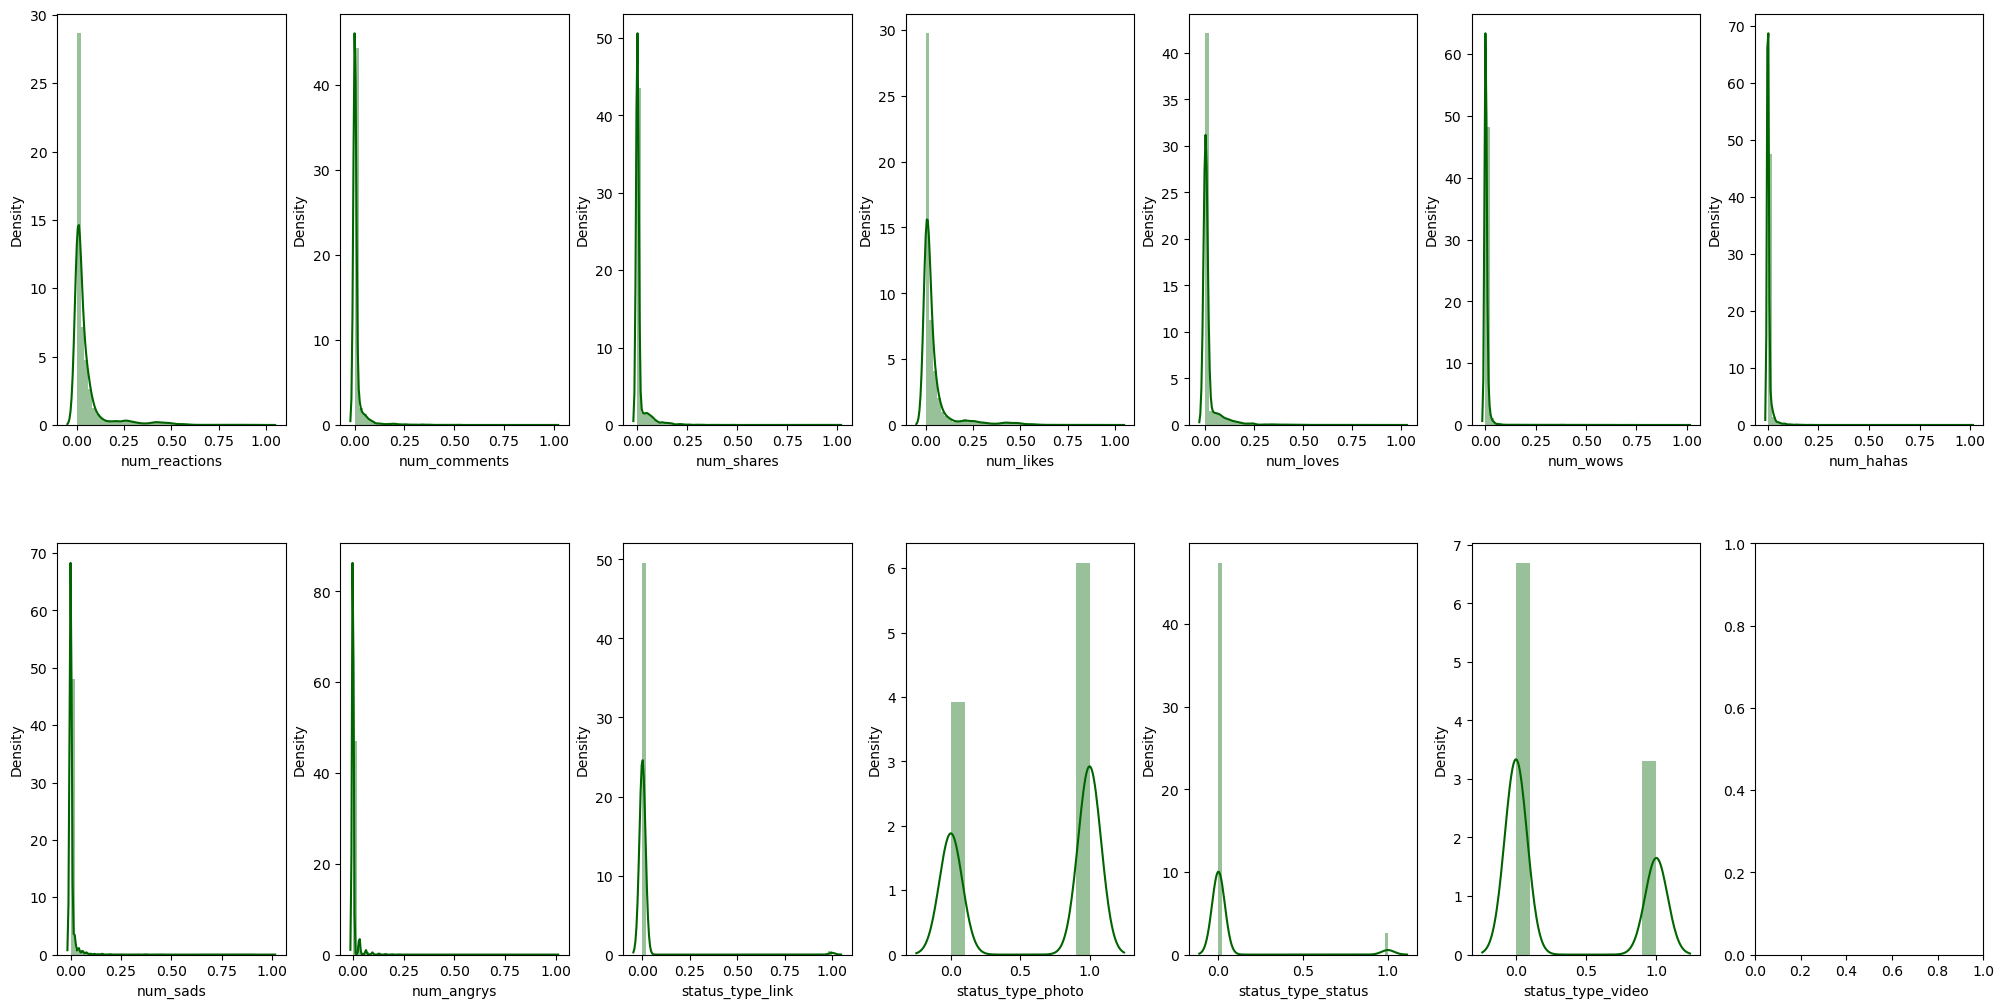

In [14]:
## Some data visualization

import seaborn as sns

col_names = df.columns.to_list()

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for col_name, val in df.items():
    sns.distplot(val, ax=axs[index], color='darkgreen')
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

All the enteries in the dataset is already lies between 0 - 1. In which few are skewed.

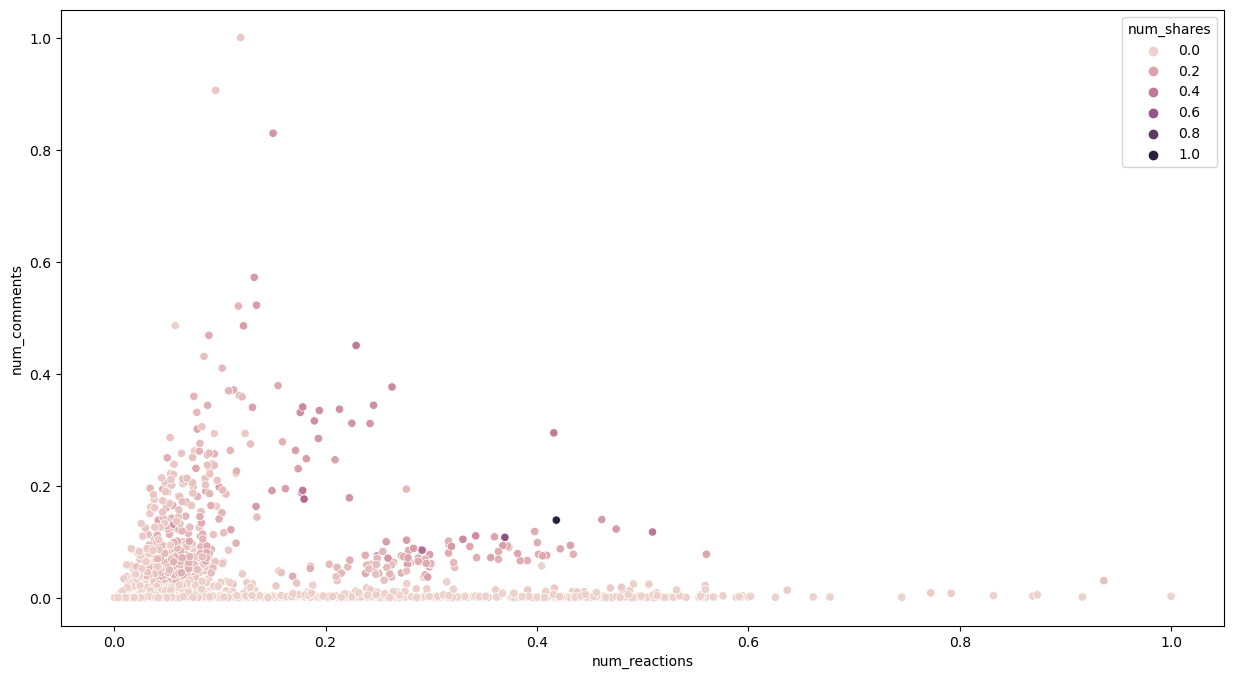

In [17]:
## Vizualizing the Data

plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='num_reactions', y='num_comments',hue='num_shares')
plt.show()

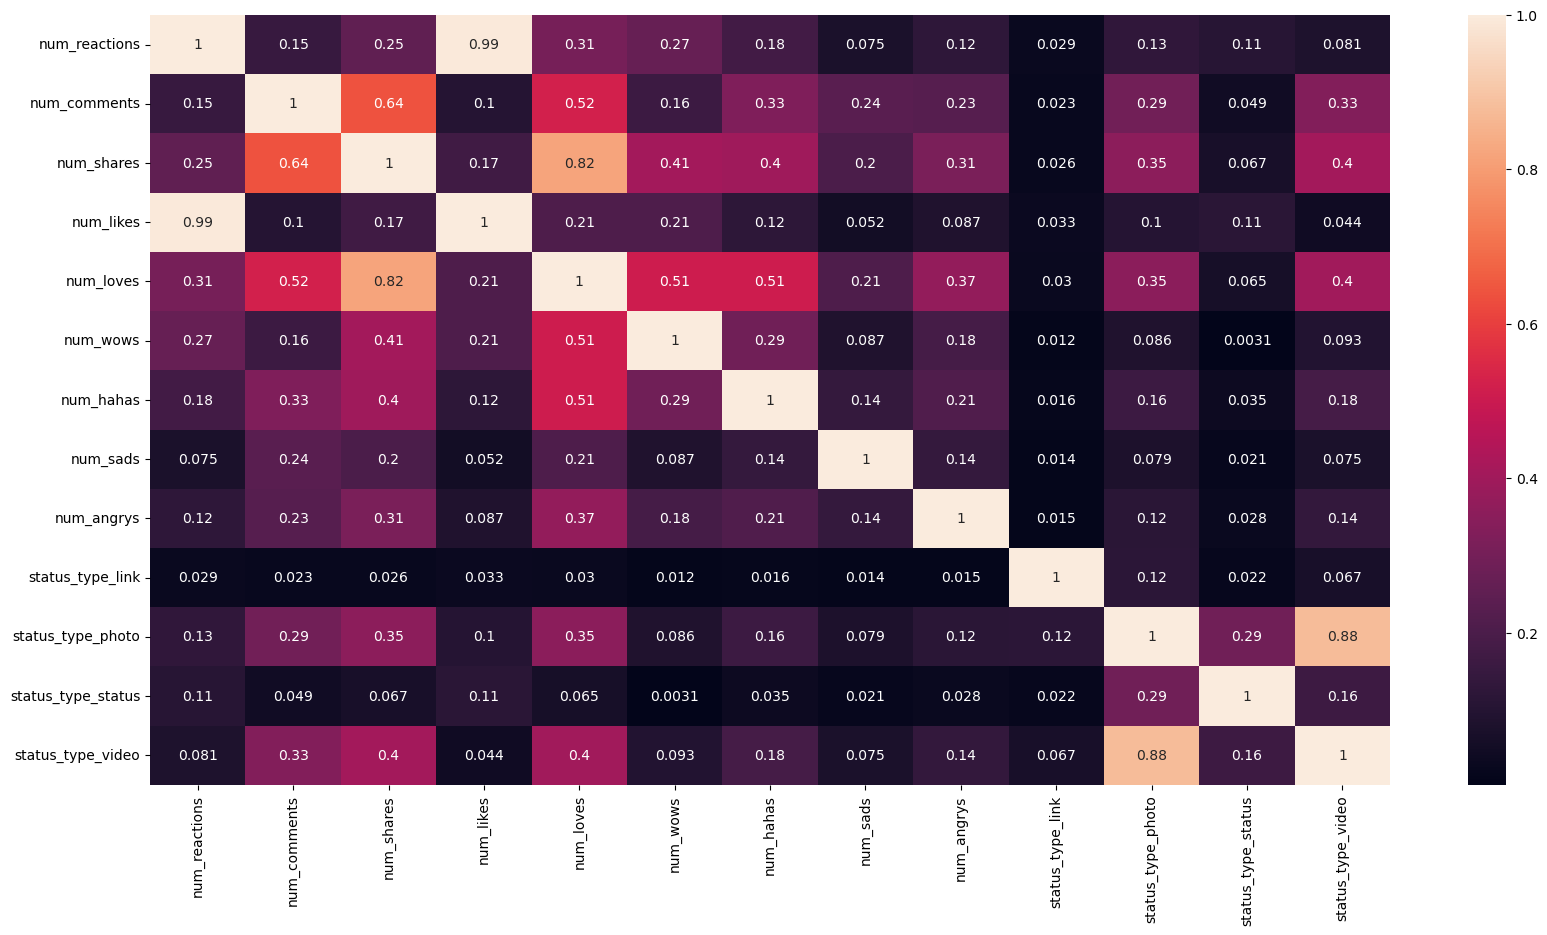

In [16]:
# Multivariate analysis - HeatMap
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)
plt.show()

### 5. Creating a Model Object

In [18]:
model = KMeans(n_clusters=3)

### 6. Model Training

In [19]:
model.fit(df)

KMeans(n_clusters=3)

### 7. Model Predictions

In [20]:
labels = model.predict(df)

### 8. Unique Labels and their Counts

In [21]:
np.unique(labels, return_counts=True)

(array([0, 1, 2]), array([4288, 2334,  428], dtype=int64))

### 9. Silhouette Analysis for Different Numbers of Clusters: KMeans Clusterin

For n_clusters=2, The Silhouette Coefficient is 0.8188237721696822
For n_clusters=3, The Silhouette Coefficient is 0.8972493682244883
For n_clusters=4, The Silhouette Coefficient is 0.9106664962327088
For n_clusters=5, The Silhouette Coefficient is 0.8866768371183754
For n_clusters=6, The Silhouette Coefficient is 0.8430118288915796
For n_clusters=7, The Silhouette Coefficient is 0.8419421782294257
For n_clusters=8, The Silhouette Coefficient is 0.8370052625268489
For n_clusters=9, The Silhouette Coefficient is 0.7601572678628534
For n_clusters=10, The Silhouette Coefficient is 0.7269371183336751
For n_clusters=11, The Silhouette Coefficient is 0.7060072343510895


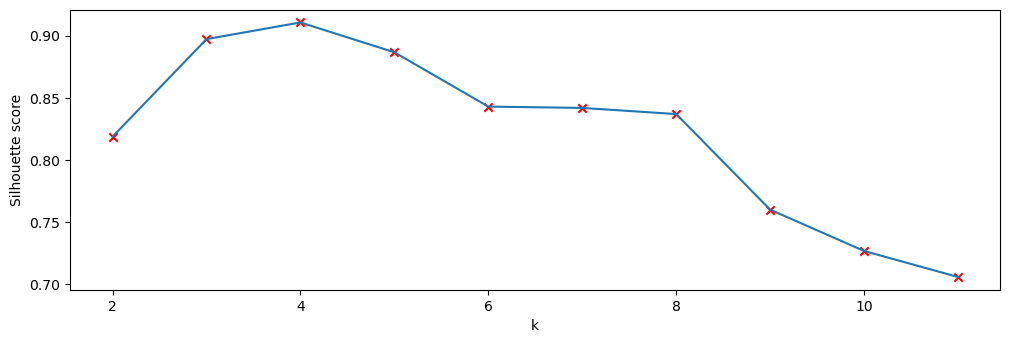

In [22]:
silhouettes = []
ks = list(range(2, 12))
for n_cluster in ks:
    kmeans = KMeans(n_clusters=n_cluster).fit(df)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    silhouettes.append(sil_coeff)

plt.figure(figsize=(12, 8))    
plt.subplot(211)
plt.scatter(ks, silhouettes, marker='x', c='r')
plt.plot(ks, silhouettes)
plt.xlabel('k')
plt.ylabel('Silhouette score');

### 10. Creating another Model Object K=4

In [23]:
model = KMeans(n_clusters=4)

### 11. Model Training

In [24]:
model.fit(df)

KMeans(n_clusters=4)

### 12. Gathering the labels

In [25]:
labels = model.predict(df)

In [26]:
## Checking the labels

np.unique(labels, return_counts=True)

(array([0, 1, 2, 3]), array([4288, 2334,  365,   63], dtype=int64))

In [27]:
df["labels"] = labels

### 13. Mean Number of Comments for Group Zero

In [28]:
group_zero = df[df["labels"]==0]["num_comments"].mean()
group_zero

0.0007619566531325948

### 14. Mean Number of Comments for Group One

In [29]:
group_one = df[df["labels"]==1]["num_comments"].mean()
group_one

0.030608773182480054

### 15. Mean Number of Comments for Group Two

In [30]:
group_two = df[df["labels"]==2]["num_comments"].mean()
group_two

0.0017264581307471548

### 16. Mean Number of Comments for Group Three

In [31]:
group_three = df[df["labels"]==3]["num_comments"].mean()
group_three

0.00027148226290672723

### 17. Mean Number of Shares for Group Zero

In [32]:
group_zero = df[df["labels"]==0]["num_shares"].mean()
group_zero

0.0007458736181824375

### 18. Mean Number of Shares for Group One

In [33]:
group_one = df[df["labels"]==1]["num_shares"].mean()
group_one

0.033785031713235436

### 19. Mean Number of Shares for Group Two

In [34]:
group_two = df[df["labels"]==2]["num_shares"].mean()
group_two

0.0007473434899500528

### 20. Mean Number of Shares for Group Three

In [37]:
group_three = df[df["labels"]==3]["num_shares"].mean()
group_three

0.001284119566829822

### 21. Most Frequent Status Type

In [39]:
status_type = df[["status_type_photo", "status_type_video", "status_type_status"]].idxmax(axis=1)
status_type.value_counts()

status_type_photo     4351
status_type_video     2334
status_type_status     365
Name: count, dtype: int64

### 22. Merged Dataset with Labels and Status Type

In [40]:
dataset = pd.concat([df["labels"],status_type.rename("status_type")], axis=1)
dataset.head()

,labels,status_type
0,1,status_type_video
1,0,status_type_photo
2,1,status_type_video
3,0,status_type_photo
4,0,status_type_photo


### 23. Count of Status Types for Each Label

In [41]:
dataset.groupby(["labels","status_type"])["status_type"].count()

labels  status_type       
0       status_type_photo     4288
1       status_type_video     2334
2       status_type_status     365
3       status_type_photo       63
Name: status_type, dtype: int64